In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import scipy.stats as stats

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
pwd

'/mnt/c/Users/Philippe/Dropbox/FCY1_DMS/growth_curves/27_10_2021'

In [3]:
FC_concentrations = [24,12,6.24,3.12,1.56,0.78,0.39,0.195, 0.0975]

CY_concentrations = [20,16,14,11,10,9,8,7,6,5]

print(len(FC_concentrations), len(CY_concentrations))

9 10


In [4]:
mass_mol_FC = 129.09
mass_mol_CY = 111.01

def convert_to_uM(ug, mass_mol):
    
    mass = ug
    
    vol = 0.001
    
    uM = (((mass*10**-6)/(vol*mass_mol))*10**6)
    
    return uM

In [5]:
convert_to_uM(25, mass_mol_FC)

193.66333565729335

In [625]:
all_concentrations = FC_concentrations+CY_concentrations
all_concentrations

[24,
 12,
 6.24,
 3.12,
 1.56,
 0.78,
 0.39,
 0.195,
 0.0975,
 20,
 16,
 14,
 11,
 10,
 9,
 8,
 7,
 6,
 5]

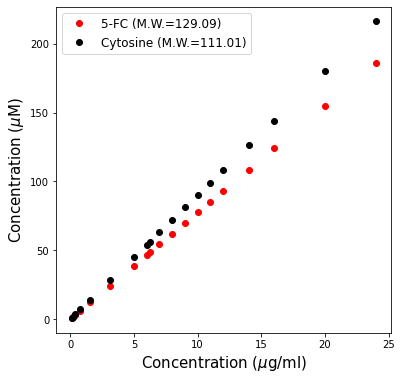

In [626]:
plt.figure(figsize=(6,6))
plt.plot(all_concentrations, [convert_to_uM(x, mass_mol_FC) for x in all_concentrations], 'ro')
plt.plot(all_concentrations, [convert_to_uM(x, mass_mol_CY) for x in all_concentrations], 'ko')

plt.xlabel('Concentration ($\mu$g/ml)', fontsize=15)
plt.ylabel('Concentration ($\mu$M)', fontsize=15)



plt.legend(['5-FC (M.W.=129.09)', 'Cytosine (M.W.=111.01)'], loc='upper left', fontsize=12)

In [627]:
sorted([convert_to_uM(x, mass_mol_FC) for x in all_concentrations]), sorted([convert_to_uM(x, mass_mol_CY) for x in all_concentrations])

([0.755287009063444,
  1.510574018126888,
  3.021148036253776,
  6.042296072507552,
  12.084592145015105,
  24.16918429003021,
  38.73266713145866,
  46.47920055775041,
  48.33836858006042,
  54.22573398404214,
  61.97226741033386,
  69.7188008366256,
  77.46533426291732,
  85.21186768920907,
  92.95840111550082,
  108.45146796808427,
  123.94453482066773,
  154.93066852583465,
  185.91680223100164],
 [0.8782992523196107,
  1.7565985046392214,
  3.513197009278443,
  7.026394018556886,
  14.052788037113771,
  28.105576074227542,
  45.04098729844157,
  54.0491847581299,
  56.211152148455085,
  63.0573822178182,
  72.06557967750652,
  81.07377713719484,
  90.08197459688314,
  99.09017205657146,
  108.0983695162598,
  126.1147644356364,
  144.13115935501304,
  180.16394919376629,
  216.1967390325196])

In [628]:
def hill_equation(x, E, n):
    
    return 1/(1+((E/x)**n))

In [629]:
test_x_data_cy = [31.25, 25.0, 20.000000000000004, 16.000000000000004, 12.800000000000002, 10.240000000000002, 8.192000000000004, 6.553600000000002, 5.242880000000003, 4.194304000000002]
test_y_data_cy = [1.0, 0.9839449541284425, 0.9665792922673685, 0.9590432503276566, 0.8830275229357827, 0.6494102228047215, 0.32929226736566264, 0.1254914809960684, 0.12942332896461303, 0.10976408912188816]

In [630]:
import scipy as sci

In [631]:
popt, pcov = sci.optimize.curve_fit(hill_equation, test_x_data_cy, test_y_data_cy)

In [632]:
popt, pcov

(array([9.13780389, 5.20373541]),
 array([[4.73785191e-02, 1.27717208e-04],
        [1.27717208e-04, 3.23947201e-01]]))

Text(0, 0.5, 'Relative growth')

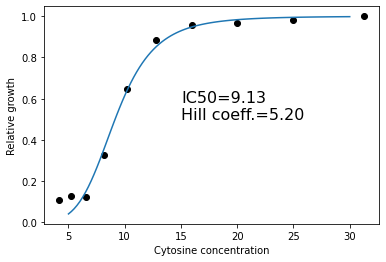

In [633]:
plt.plot(test_x_data_cy, test_y_data_cy, 'ko')

plt.plot(np.linspace(5,30,100), [hill_equation(x,9.13780389, 5.20373541) for x in np.linspace(5,30,100)])

plt.text(15, 0.5, 'IC50=9.13\nHill coeff.=5.20', fontsize=16)

plt.xlabel('Cytosine concentration')
plt.ylabel('Relative growth')

In [634]:
test_data_x_fc = [0, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25.0]
test_data_y_fc = [1-x for x in [0.9456094364351264, 0.7486893840104877, 0.6294233289646148, 0.4908256880733953, 0.3571428571428586, 0.25917431192660517, 0.18184796854521662, 0.1500655307994761]]

In [635]:
test_data_x_fc

[0, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25.0]

In [636]:
popt, pcov = sci.optimize.curve_fit(hill_equation, test_data_x_fc, test_data_y_fc)

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [637]:
popt, pcov

(array([1.56117394, 0.7297962 ]),
 array([[0.01384645, 0.00128893],
        [0.00128893, 0.00226692]]))

In [638]:
np.sqrt(np.diag(pcov))

array([0.11767092, 0.04761214])

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Growth inhibition')

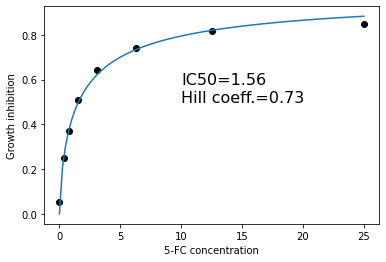

In [639]:
plt.plot(test_data_x_fc, test_data_y_fc, 'ko')

plt.plot(np.linspace(0,25,100), [hill_equation(x,1.56117394, 0.7297962) for x in np.linspace(0,25,100)])

plt.text(10, 0.5, 'IC50=1.56\nHill coeff.=0.73', fontsize=16)

plt.xlabel('5-FC concentration')
plt.ylabel('Growth inhibition')

In [640]:
conc_series_1 = [24,12,6.24,3.12,1.56,0.78,0.39,0.195,0.0975,0]

conc_series_2 = [20,16,14,11,10,9,8,7,6,5]

len(conc_series_1), len(conc_series_2)

(10, 10)

## Cytosine source data

In [641]:
CY_source_table = './hill_curve_27102021_cytosine.xlsx'

In [642]:
CY_source_df = pd.read_excel(CY_source_table, header=0, nrows=96, index_col=0)

CY_source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,144919s,145819s,146719s,147619s,148519s,149419s,150320s,151220s,152120s,153020s
A1,0.080100,0.080300,0.080000,0.079725,0.080225,0.080575,0.077975,0.078125,0.078300,0.078000,...,0.078325,0.078175,0.07825,0.078350,0.078525,0.078325,0.078225,0.078125,0.078225,0.078425
A2,0.077675,0.077625,0.077650,0.077750,0.077850,0.077925,0.078000,0.077975,0.078125,0.078250,...,0.078450,0.078500,0.07845,0.078525,0.078500,0.078475,0.078400,0.078450,0.078475,0.078550
A3,0.077450,0.077425,0.077625,0.077725,0.077950,0.077875,0.077825,0.077950,0.078125,0.078225,...,0.078425,0.078450,0.07840,0.078525,0.078475,0.078350,0.078325,0.078300,0.078375,0.078350
A4,0.077725,0.077875,0.078100,0.077950,0.078000,0.078125,0.078100,0.078200,0.078100,0.078200,...,0.078600,0.078625,0.07875,0.078750,0.078750,0.078650,0.078525,0.078550,0.078575,0.078700
A5,0.078150,0.078100,0.078300,0.078075,0.078100,0.078450,0.078300,0.078375,0.078300,0.078425,...,0.078625,0.078575,0.07865,0.078575,0.078650,0.078650,0.078550,0.078500,0.078675,0.078850


In [643]:
rename_dict = {}


for col_name in CY_source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
CY_source_df.rename(columns = rename_dict, inplace=True)

CY_source_df=CY_source_df.T
CY_source_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.000000,0.080100,0.077675,0.077450,0.077725,0.078150,0.077500,0.078275,0.078925,0.078650,0.078575,...,0.079300,0.078900,0.079025,0.080200,0.079250,0.079225,0.079250,0.078375,0.078600,0.079175
0.250000,0.080300,0.077625,0.077425,0.077875,0.078100,0.077450,0.078400,0.078875,0.078525,0.078550,...,0.079300,0.078725,0.078975,0.079850,0.079050,0.078950,0.078900,0.078350,0.078625,0.079000
0.500000,0.080000,0.077650,0.077625,0.078100,0.078300,0.077500,0.077950,0.078825,0.078425,0.078575,...,0.079600,0.079050,0.079250,0.080175,0.079400,0.079150,0.079250,0.078750,0.078975,0.079375
0.750000,0.079725,0.077750,0.077725,0.077950,0.078075,0.077525,0.077725,0.078975,0.078375,0.078550,...,0.079400,0.078750,0.079000,0.080000,0.079125,0.079000,0.079075,0.078550,0.078700,0.078925
1.000000,0.080225,0.077850,0.077950,0.078000,0.078100,0.077650,0.077800,0.078875,0.078500,0.078475,...,0.079100,0.078675,0.078850,0.079850,0.078950,0.078925,0.078825,0.078425,0.078425,0.078775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.505278,0.078325,0.078475,0.078350,0.078650,0.078650,0.078200,0.078175,0.079200,0.078725,0.079125,...,0.077275,0.076850,0.076900,0.077900,0.076950,0.077150,0.077150,0.077175,0.076925,0.077250
41.755556,0.078225,0.078400,0.078325,0.078525,0.078550,0.078100,0.078450,0.079125,0.078600,0.078975,...,0.077325,0.076925,0.076925,0.077850,0.077025,0.077075,0.077150,0.076975,0.077075,0.077225
42.005556,0.078125,0.078450,0.078300,0.078550,0.078500,0.078100,0.078325,0.079300,0.078875,0.079400,...,0.077925,0.077400,0.077425,0.078300,0.077475,0.077525,0.077600,0.077300,0.077600,0.077800
42.255556,0.078225,0.078475,0.078375,0.078575,0.078675,0.078300,0.078075,0.079325,0.078900,0.078975,...,0.078100,0.077700,0.077825,0.078650,0.077850,0.077900,0.078025,0.077575,0.078050,0.078025


In [644]:
def get_derivative_growth_rate(well, df, tmax=48):
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    
    #print(well)
    
    df_data = df.loc[df_cols]
    data = df_data[well]


    data_diff = data.diff()*4
    
    #print(data_diff)
    
    get_top_5 = data_diff.nlargest(5)
    
    #print(get_top_5)
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    
    return growth_rate, std_err

In [645]:
get_derivative_growth_rate('B11', CY_source_df, tmax=15)



(0.007199999999999984, 0.001767873298627474)

In [646]:
def get_AUC(well, df, t_end = 24):
    
    df_indexes = [ x for x in list(df.index) if x<=t_end]
    
    #print(well)
    
    df_data = df.loc[df_indexes]
    data = df_data[well]
       
    x_vals = list(data.index)
    y_vals = [data.loc[x] for x in list(data.index)]
    
    auc = np.trapz(y_vals, x=x_vals)
    
    return auc
    

In [647]:
get_AUC('B11', CY_source_df)

3.3541839180555555

In [648]:
get_derivative_growth_rate('B2', CY_source_df, tmax=15)


(0.12280000000000002, 0.0026544573833460396)

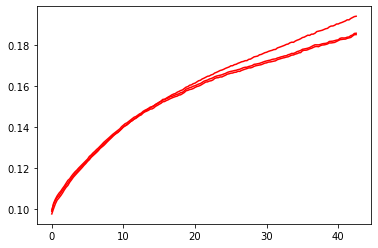

In [649]:


plt.plot(CY_source_df['B11'], 'r')
plt.plot(CY_source_df['C11'], 'r')
plt.plot(CY_source_df['D11'], 'r')

In [650]:
well_dict = {}

mol_dict = {}

conc_dict = {}

molar_dict = {}

growth_rate_dict = {}

auc_dict = {}

In [651]:
col_list = list(range(2,12))

conc_1_rows = ['B', 'C', 'D']
conc_2_rows = ['E', 'F', 'G']

index = 0

df_list = [CY_source_df]

mol_list = ['Cyto']

for y in range(0,1):
    
    df = df_list[y]
    
    mol=mol_list[y]
    
    if mol == '5-FC':
        
        mass_mol = mass_mol_FC
        
    else:
        
        mass_mol = mass_mol_CY

    for x in range(0,10):

        for row in conc_1_rows:

            well = row + str(col_list[x])

            conc = conc_series_1[x]

            growth_rate = get_derivative_growth_rate(well, df, tmax=32)[0]
            
            auc = get_AUC(well, df)

            #print(index, well, mol, conc, growth_rate[0])
            
            well_dict[index] = well
            mol_dict[index] = mol
            molar_dict[index] = convert_to_uM(conc, mass_mol)
            conc_dict[index] = conc
            growth_rate_dict[index] = growth_rate
            auc_dict[index] = auc

            index+=1


        for row in conc_2_rows:

            well = row + str(col_list[x])

            conc = conc_series_2[x]

            #print(index, well, mol, conc, growth_rate[0])
            
            growth_rate = get_derivative_growth_rate(well, df, tmax=32)[0]
            
            auc = get_AUC(well, df)
            
            well_dict[index] = well
            mol_dict[index] = mol
            molar_dict[index] = convert_to_uM(conc, mass_mol)
            conc_dict[index] = conc
            growth_rate_dict[index] = growth_rate
            
            auc_dict[index] = auc

            

            index+=1









In [652]:
well_series = pd.Series(well_dict, name='well')
mol_series = pd.Series(mol_dict, name='mol')
conc_series = pd.Series(conc_dict, name='conc', dtype=float)
molar_series = pd.Series(molar_dict, name='molar', dtype=float)
growth_rate_series = pd.Series(growth_rate_dict, name='growth', dtype=float)
auc_series = pd.Series(auc_dict, name='auc', dtype=float)

In [653]:
auc_series.dtype

dtype('float64')

In [654]:
growth_rates_df=pd.concat([well_series, mol_series, conc_series, molar_series, growth_rate_series, auc_series],axis=1)
growth_rates_df

,well,mol,conc,molar,growth,auc
0,B2,Cyto,24.0000,216.196739,0.12280,17.668814
1,C2,Cyto,24.0000,216.196739,0.11968,17.388937
2,D2,Cyto,24.0000,216.196739,0.12200,17.455563
3,E2,Cyto,20.0000,180.163949,0.11820,17.165805
4,F2,Cyto,20.0000,180.163949,0.11752,17.140299
5,G2,Cyto,20.0000,180.163949,0.11952,17.346674
6,B3,Cyto,12.0000,108.098370,0.11648,16.722688
7,C3,Cyto,12.0000,108.098370,0.11880,16.917288
8,D3,Cyto,12.0000,108.098370,0.11820,16.772349
9,E3,Cyto,16.0000,144.131159,0.11368,16.356426


In [655]:
growth_rates_df.dtypes

well       object
mol        object
conc      float64
molar     float64
growth    float64
auc       float64
dtype: object

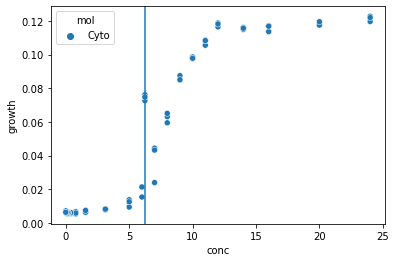

In [656]:
sns.scatterplot(data=growth_rates_df, x='conc', y='growth', hue='mol')

plt.axvline(6.24)

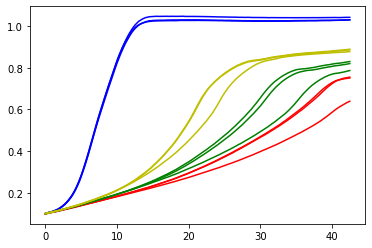

In [657]:
plt.plot(CY_source_df['B2'], 'b')
plt.plot(CY_source_df['C2'], 'b')
plt.plot(CY_source_df['D2'], 'b')

plt.plot(CY_source_df['E10'], 'r')
plt.plot(CY_source_df['F10'], 'r')
plt.plot(CY_source_df['G10'], 'r')


plt.plot(CY_source_df['E9'], 'g')
plt.plot(CY_source_df['F9'], 'g')
plt.plot(CY_source_df['G9'], 'g')


plt.plot(CY_source_df['E8'], 'y')
plt.plot(CY_source_df['F8'], 'y')
plt.plot(CY_source_df['G8'], 'y')


#dilution E4 is inconsistent with the rest of the curves, both for 5-FC and CY. Will remove the timepoints.

In [658]:
growth_rates_df[growth_rates_df['conc'] == 6.24]

,well,mol,conc,molar,growth,auc
12,B4,Cyto,6.24,56.211152,0.07268,9.360979
13,C4,Cyto,6.24,56.211152,0.07620,9.572325
14,D4,Cyto,6.24,56.211152,0.07480,9.481802


In [659]:
growth_rates_df.drop([12,13,14], inplace=True)
growth_rates_df[growth_rates_df['conc'] == 6.24]

,well,mol,conc,molar,growth,auc


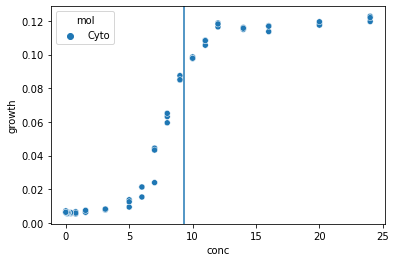

In [660]:
sns.scatterplot(data=growth_rates_df, x='conc', y='growth', hue='mol')

plt.axvline(9.32)


In [661]:
CY_max_rate = np.mean(growth_rates_df[(growth_rates_df['conc']==24)&(growth_rates_df['mol']=='Cyto')]['growth'])

In [662]:
CY_max_rate

0.12149333333333345

In [663]:
growth_rates_df['rel_CY_growth'] = growth_rates_df['growth']/CY_max_rate
growth_rates_df_cy = growth_rates_df[growth_rates_df['mol']=='Cyto']

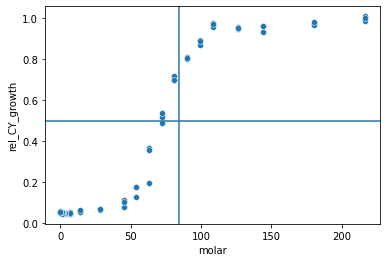

In [664]:
sns.scatterplot(data=growth_rates_df_cy, x='molar', y='rel_CY_growth')

plt.axvline(84)
plt.axhline(0.5)

<AxesSubplot:xlabel='growth', ylabel='auc'>

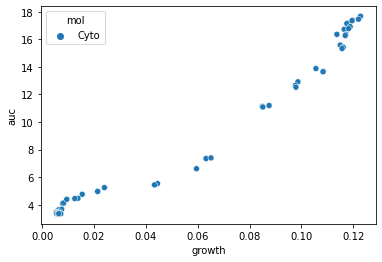

In [665]:
sns.scatterplot(data=growth_rates_df, x='growth', y='auc', hue='mol')

In [666]:
growth_rates_df_cy

,well,mol,conc,molar,growth,auc,rel_CY_growth
0,B2,Cyto,24.0000,216.196739,0.12280,17.668814,1.010755
1,C2,Cyto,24.0000,216.196739,0.11968,17.388937,0.985075
2,D2,Cyto,24.0000,216.196739,0.12200,17.455563,1.004170
3,E2,Cyto,20.0000,180.163949,0.11820,17.165805,0.972893
4,F2,Cyto,20.0000,180.163949,0.11752,17.140299,0.967296
5,G2,Cyto,20.0000,180.163949,0.11952,17.346674,0.983758
6,B3,Cyto,12.0000,108.098370,0.11648,16.722688,0.958736
7,C3,Cyto,12.0000,108.098370,0.11880,16.917288,0.977831
8,D3,Cyto,12.0000,108.098370,0.11820,16.772349,0.972893
9,E3,Cyto,16.0000,144.131159,0.11368,16.356426,0.935689


In [667]:
stats.spearmanr(growth_rates_df_cy['growth'], growth_rates_df_cy['auc'])

SpearmanrResult(correlation=0.9713822724271947, pvalue=5.076974198423035e-36)

In [668]:
convert_to_uM(1.56, mass_mol_FC)

12.084592145015105

In [669]:
growth_rates_df_cy.loc[30]

well                   B7
mol                  Cyto
conc                 0.78
molar            7.026394
growth            0.00668
auc              3.493486
rel_CY_growth    0.054982
Name: 30, dtype: object

In [670]:
import scipy as sci

In [671]:
popt, pcov = sci.optimize.curve_fit(hill_equation, growth_rates_df_cy['molar'], growth_rates_df_cy['rel_CY_growth'])

In [672]:
popt, pcov

(array([70.96510207,  6.10323637]),
 array([[0.39131832, 0.03073849],
        [0.03073849, 0.08817957]]))

In [673]:
dof = np.size(growth_rates_df_cy['molar']) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)


ci_cy = tval*np.sqrt(pcov)[0]

ci_cy

array([1.25313606, 0.35121606])

In [674]:
std = np.sqrt(np.diag(pcov))

In [675]:
std[0]

0.6255544061878481

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Relative growth')

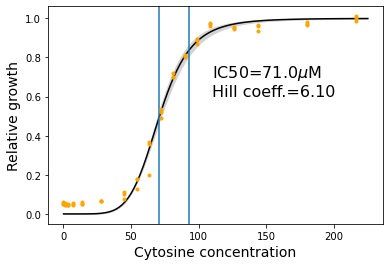

In [676]:
plt.plot(growth_rates_df_cy['molar'], growth_rates_df_cy['rel_CY_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(np.linspace(0.1,225,100), [hill_equation(x,70.96510207, 6.10323637) for x in np.linspace(0,225,100)], 'k')



plt.fill_between(np.linspace(0.1,225,100), [hill_equation(x,70.96510207+ci_cy[0], 6.10323637-ci_cy[1]) for x in np.linspace(0,225,100)],
                 [hill_equation(x,70.96510207-ci_cy[0], 6.10323637+ci_cy[1]) for x in np.linspace(0,225,100)], color='lightgrey')

plt.text(110, 0.6, 'IC50=71.0$\mu$M\nHill coeff.=6.10', fontsize=16)
plt.axvline(71)
plt.axvline(92.60)


plt.xlabel('Cytosine concentration', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)

In [677]:
growth_rates_df_cy

,well,mol,conc,molar,growth,auc,rel_CY_growth
0,B2,Cyto,24.0000,216.196739,0.12280,17.668814,1.010755
1,C2,Cyto,24.0000,216.196739,0.11968,17.388937,0.985075
2,D2,Cyto,24.0000,216.196739,0.12200,17.455563,1.004170
3,E2,Cyto,20.0000,180.163949,0.11820,17.165805,0.972893
4,F2,Cyto,20.0000,180.163949,0.11752,17.140299,0.967296
5,G2,Cyto,20.0000,180.163949,0.11952,17.346674,0.983758
6,B3,Cyto,12.0000,108.098370,0.11648,16.722688,0.958736
7,C3,Cyto,12.0000,108.098370,0.11880,16.917288,0.977831
8,D3,Cyto,12.0000,108.098370,0.11820,16.772349,0.972893
9,E3,Cyto,16.0000,144.131159,0.11368,16.356426,0.935689


In [678]:
hill_equation(85, 70.96510207, 6.10323637)

0.7505239173603172

In [679]:
convert_to_uM(9.5, mass_mol_CY)

85.57787586703898

In [680]:
np.log2(10.03171375), np.log2(70.96510207)

(3.3264961821364265, 6.149037831506036)

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.axis.XTick at 0x7f9d59cccfd0>,
 [Text(0.25, 0, '0.25'),
  Text(1.0, 0, '1'),
  Text(4.0, 0, '4'),
  Text(16.0, 0, '16'),
  Text(64.0, 0, '64'),
  Text(256.0, 0, '256')])

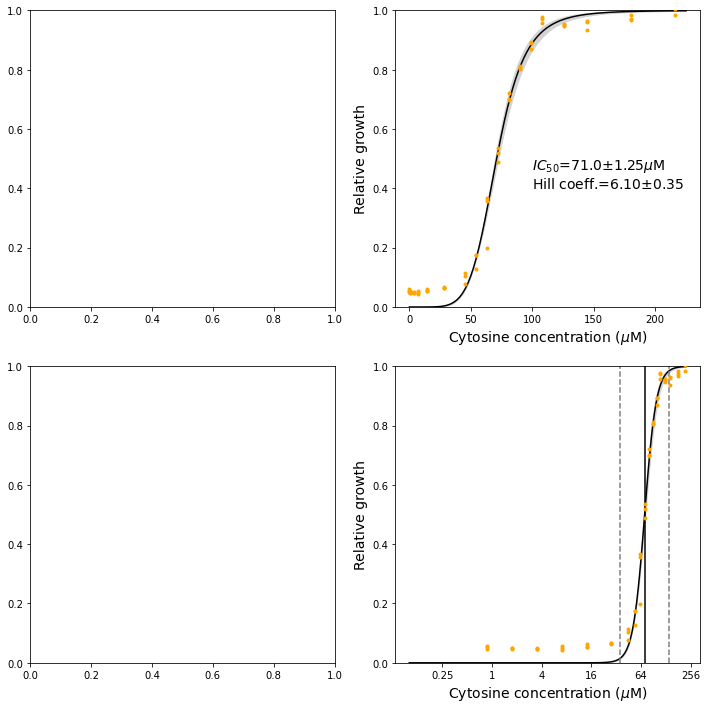

In [682]:
plt.figure(figsize=(12,12))

plt.subplot(221) #################################################
#plt.plot(growth_rates_df_fc['molar'], growth_rates_df_fc['rel_FC_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)

#plt.plot(np.linspace(0.1,225,100), [hill_equation(x,10.03171375, 0.66286579) for x in np.linspace(0,225,100)], 'k')


#plt.fill_between(np.linspace(0.1,225,100), [hill_equation(x,10.03171022-ci_fc[0], 0.66286563+ci_fc[1]) for x in np.linspace(0,225,100)],
#                 [hill_equation(x,10.03171022+ci_fc[0], 0.66286563-ci_fc[1]) for x in np.linspace(0,225,100)], color='lightgrey')

#plt.ylim(0,1)

#plt.text(100, 0.4, '$IC_{50}$=10.0$\pm$0.56$\mu$M\nHill coeff.=0.66$\pm$0.08', fontsize=14)

#plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
#plt.ylabel('Growth inhibition', fontsize=14)





plt.subplot(222) #################################################

plt.plot(growth_rates_df_cy['molar'], growth_rates_df_cy['rel_CY_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(np.linspace(0.1,225,100), [hill_equation(x,70.96510207, 6.10323637) for x in np.linspace(0,225,100)], 'k')

plt.fill_between(np.linspace(0.1,225,100), [hill_equation(x,70.96510207+ci_cy[0], 6.10323637-ci_cy[1]) for x in np.linspace(0,225,100)],
                 [hill_equation(x,70.96510207-ci_cy[0], 6.10323637+ci_cy[1]) for x in np.linspace(0,225,100)], color='lightgrey')
plt.ylim(0,1)

plt.text(100, 0.4, '$IC_{50}$=71.0$\pm$1.25$\mu$M\nHill coeff.=6.10$\pm$0.35', fontsize=14)

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)




plt.subplot(223) #################################################

#plt.plot(growth_rates_df_fc['molar'], growth_rates_df_fc['rel_FC_growth'], color='orange', marker='o', ms=3, linestyle='None', zorder=9)

#plt.plot(np.linspace(0.1,225,100), [hill_equation(x,10.03171375, 0.66286579) for x in np.linspace(0,225,100)], 'k')

#plt.fill_between(np.linspace(0.1,225,100), [hill_equation(x,10.03171022-ci_fc[0], 0.66286563+ci_fc[1]) for x in np.linspace(0,225,100)],
#                 [hill_equation(x,10.03171022+ci_fc[0], 0.66286563-ci_fc[1]) for x in np.linspace(0,225,100)], color='lightgrey')


#plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
#plt.ylabel('Growth inhibition', fontsize=14)



#plt.axvline(10.0, color='k', linestyle='-')
#plt.axvline(2**2.33, color='grey', linestyle='--')
#plt.axvline(2**4.33, color='grey', linestyle='--')


#plt.xscale('log', base=2)
#plt.ylim(0,1)

#plt.xticks([0.25,1, 4,16,64,256], [str(x) for x in [0.25,1, 4,16,64,256]])

plt.subplot(224) #################################################

plt.plot(growth_rates_df_cy['molar'], growth_rates_df_cy['rel_CY_growth'], 'ko', color='orange', marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(np.linspace(0.1,225,100), [hill_equation(x,70.96510207, 6.10323637) for x in np.linspace(0,225,100)], 'k')

plt.fill_between(np.linspace(0.1,225,100), [hill_equation(x,70.96510207+ci_cy[0], 6.10323637-ci_cy[1]) for x in np.linspace(0,225,100)],
                 [hill_equation(x,70.96510207-ci_cy[0], 6.10323637+ci_cy[1]) for x in np.linspace(0,225,100)], color='lightgrey')



plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)



plt.axvline(71.0, color='k', linestyle='-')
plt.axvline(2**5.15, color='grey', linestyle='--')
plt.axvline(2**7.15, color='grey', linestyle='--')


plt.xscale('log', base=2)

plt.ylim(0,1)

plt.xticks([0.25,1, 4,16,64,256], [str(x) for x in [0.25,1, 4,16,64,256]])

In [683]:
convert_to_uM(100, mass_mol_FC)

774.6533426291734

In [684]:
growth_rates_df_cy.to_csv('./hill_curve_cytosine.csv', sep=',')

In [685]:
fc_second_plate = './hill_curve_12112021_5fc.xlsx'

fc_second_df = pd.read_excel(fc_second_plate, index_col=0)
fc_second_df

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,147619s,148520s,149420s,150320s,151220s,152120s,153020s,153920s,154820s,155720s
A1,0.078425,0.078675,0.078700,0.078700,0.078650,0.078750,0.078825,0.078975,0.079075,0.079200,...,0.079250,0.079300,0.079275,0.079275,0.079350,0.079250,0.079275,0.079200,0.079275,0.079550
A2,0.079100,0.079525,0.079200,0.079175,0.079450,0.080525,0.078625,0.078800,0.078950,0.078950,...,0.079125,0.079200,0.079250,0.079150,0.079325,0.079075,0.079150,0.079125,0.079150,0.079275
A3,0.078375,0.080150,0.080475,0.080725,0.080850,0.080750,0.081100,0.081100,0.080825,0.080825,...,0.082200,0.082425,0.082225,0.082375,0.082350,0.082275,0.082325,0.082250,0.082275,0.082275
A4,0.078150,0.078325,0.078325,0.078225,0.078250,0.078275,0.078275,0.078325,0.078475,0.078550,...,0.078500,0.078625,0.078650,0.078575,0.078500,0.078575,0.078450,0.078475,0.078550,0.078425
A5,0.077825,0.077675,0.077575,0.077775,0.077825,0.077675,0.077825,0.077900,0.077925,0.078050,...,0.078550,0.078575,0.078675,0.078600,0.078650,0.078625,0.078475,0.078575,0.078675,0.078600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.078725,0.079475,0.079425,0.079250,0.079100,0.078675,0.078675,0.078675,0.078775,0.079000,...,0.077475,0.078050,0.078525,0.078025,0.077450,0.077250,0.077125,0.077400,0.078075,0.078400
H9,0.078425,0.079200,0.079025,0.078600,0.078475,0.078350,0.078325,0.078225,0.078325,0.078450,...,0.077575,0.078075,0.078475,0.078150,0.077725,0.077400,0.077275,0.077450,0.078075,0.078425
H10,0.078700,0.079650,0.079450,0.079225,0.079075,0.078750,0.078725,0.078700,0.078775,0.078725,...,0.077800,0.078225,0.078550,0.078225,0.077825,0.077450,0.077250,0.077575,0.078175,0.078450
H11,0.080250,0.081050,0.080875,0.080650,0.080325,0.080200,0.079975,0.080350,0.080250,0.080300,...,0.077700,0.078250,0.078625,0.078325,0.077625,0.077400,0.077400,0.077475,0.078200,0.078700


In [686]:
rename_dict = {}


for col_name in fc_second_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
fc_second_df.rename(columns = rename_dict, inplace=True)

fc_second_df=fc_second_df.T
fc_second_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.000000,0.078425,0.079100,0.078375,0.078150,0.077825,0.078425,0.079150,0.078375,0.078000,0.077375,...,0.078775,0.079025,0.078775,0.079350,0.078950,0.078725,0.078425,0.078700,0.080250,0.077925
0.250000,0.078675,0.079525,0.080150,0.078325,0.077675,0.078425,0.079375,0.078300,0.078225,0.078075,...,0.079575,0.079775,0.079775,0.080300,0.079500,0.079475,0.079200,0.079650,0.081050,0.078800
0.500000,0.078700,0.079200,0.080475,0.078325,0.077575,0.078425,0.079275,0.078300,0.078200,0.078000,...,0.079350,0.079600,0.079575,0.079775,0.079275,0.079425,0.079025,0.079450,0.080875,0.078875
0.750000,0.078700,0.079175,0.080725,0.078225,0.077775,0.078575,0.079475,0.078500,0.078050,0.078225,...,0.079050,0.079475,0.079250,0.079625,0.079100,0.079250,0.078600,0.079225,0.080650,0.078400
1.000000,0.078650,0.079450,0.080850,0.078250,0.077825,0.078575,0.079425,0.078475,0.078200,0.078175,...,0.078775,0.079175,0.079150,0.079425,0.078900,0.079100,0.078475,0.079075,0.080325,0.078400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.255556,0.079250,0.079075,0.082275,0.078575,0.078625,0.078825,0.079675,0.078675,0.077975,0.078475,...,0.077675,0.077825,0.077650,0.078300,0.077300,0.077250,0.077400,0.077450,0.077400,0.076875
42.505556,0.079275,0.079150,0.082325,0.078450,0.078475,0.078650,0.079525,0.078700,0.077925,0.078400,...,0.077550,0.077725,0.077550,0.078175,0.077025,0.077125,0.077275,0.077250,0.077400,0.076825
42.755556,0.079200,0.079125,0.082250,0.078475,0.078575,0.078650,0.079550,0.078650,0.077900,0.078450,...,0.078000,0.077850,0.077800,0.078325,0.077300,0.077400,0.077450,0.077575,0.077475,0.077075
43.005556,0.079275,0.079150,0.082275,0.078550,0.078675,0.078800,0.079750,0.078775,0.078025,0.078625,...,0.078450,0.078500,0.078425,0.079025,0.078025,0.078075,0.078075,0.078175,0.078200,0.077600


In [687]:
second_conc_1 = [(100)/(2**x) for x in range(0,10)]
second_conc_2 = [(100)/(2**x) for x in range(10,19)]+[0]

second_conc_1, second_conc_2

([100.0, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125],
 [0.09765625,
  0.048828125,
  0.0244140625,
  0.01220703125,
  0.006103515625,
  0.0030517578125,
  0.00152587890625,
  0.000762939453125,
  0.0003814697265625,
  0])

In [688]:
well_dict = {}
mol_dict = {}
conc_dict = {}
molar_dict = {}
growth_rate_dict = {}
auc_dict = {}

In [689]:
conc_1_rows = ['B', 'C', 'D']
conc_2_rows = ['E', 'F', 'G']

index = 0

df_list = [fc_second_df]

mol_list = ['5-FC', 'Cyto']

for y in range(0,1):
    
    df = df_list[y]
    
    mol=mol_list[y]
    
    if mol == '5-FC':
        
        mass_mol = mass_mol_FC
        
    else:
        
        mass_mol = mass_mol_CY

    for x in range(0,10):

        for row in conc_1_rows:

            well = row + str(col_list[x])

            conc = second_conc_1[x]

            growth_rate = get_derivative_growth_rate(well, df, tmax=32)[0]
            
            auc = get_AUC(well, df)

            #print(index, well, mol, conc, growth_rate[0])
            
            well_dict[index] = well
            mol_dict[index] = mol
            molar_dict[index] = convert_to_uM(conc, mass_mol)
            conc_dict[index] = conc
            growth_rate_dict[index] = growth_rate
            auc_dict[index] = auc

            index+=1


        for row in conc_2_rows:

            well = row + str(col_list[x])

            conc = second_conc_2[x]

            #print(index, well, mol, conc, growth_rate[0])
            
            growth_rate = get_derivative_growth_rate(well, df, tmax=32)[0]
            
            auc = get_AUC(well, df)
            
            well_dict[index] = well
            mol_dict[index] = mol
            molar_dict[index] = convert_to_uM(conc, mass_mol)
            conc_dict[index] = conc
            growth_rate_dict[index] = growth_rate
            
            auc_dict[index] = auc

            

            index+=1

In [690]:
well_series = pd.Series(well_dict, name='well')
mol_series = pd.Series(mol_dict, name='mol')
conc_series = pd.Series(conc_dict, name='conc', dtype=float)
molar_series = pd.Series(molar_dict, name='molar', dtype=float)
growth_rate_series = pd.Series(growth_rate_dict, name='growth', dtype=float)
auc_series = pd.Series(auc_dict, name='auc', dtype=float)

In [691]:
auc_series.dtype

dtype('float64')

In [692]:
growth_rates_fc2_df=pd.concat([well_series, mol_series, conc_series, molar_series, growth_rate_series, auc_series],axis=1)
growth_rates_fc2_df

,well,mol,conc,molar,growth,auc
0,B2,5-FC,100.000000,774.653343,0.00548,3.171406
1,C2,5-FC,100.000000,774.653343,0.00760,3.708240
2,D2,5-FC,100.000000,774.653343,0.00820,3.768887
3,E2,5-FC,0.097656,0.756497,0.10252,15.612712
4,F2,5-FC,0.097656,0.756497,0.10288,16.173433
5,G2,5-FC,0.097656,0.756497,0.10260,16.234920
6,B3,5-FC,50.000000,387.326671,0.00516,3.194384
7,C3,5-FC,50.000000,387.326671,0.00756,3.787505
8,D3,5-FC,50.000000,387.326671,0.00832,3.851907
9,E3,5-FC,0.048828,0.378249,0.10956,15.888564


In [693]:
FC_max_rate = np.mean(growth_rates_fc2_df[(growth_rates_fc2_df['conc']==0)&(growth_rates_fc2_df['mol']=='5-FC')]['growth'])
FC_max_rate

0.1144400000000001

In [694]:
growth_rates_fc2_df['rel_FC_growth'] = 1-(growth_rates_fc2_df['growth']/FC_max_rate)


In [695]:
popt, pcov = sci.optimize.curve_fit(hill_equation, growth_rates_fc2_df['molar'], growth_rates_fc2_df['rel_FC_growth'])

In [696]:
popt, pcov

(array([9.1395844 , 0.80356349]),
 array([[ 4.16829465e-02, -1.25761502e-05],
        [-1.25761502e-05,  1.64212025e-04]]))

In [697]:
dof = np.size(growth_rates_fc2_df['molar']) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)


ci_fc_IC = tval*np.sqrt(pcov[0][0])
ci_fc_n = tval*np.sqrt(pcov[1][1])


ci_fc_IC, ci_fc_n

(0.408531257326116, 0.0256418032903198)

In [698]:
np.log2(0.0003814697265625)

-11.356143810225275

In [699]:
x_vals = np.logspace(np.log2(0.002955),np.log2(775), num=50, base=2)

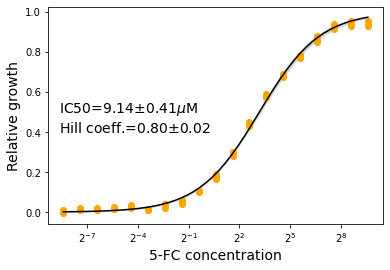

In [700]:
plt.plot(growth_rates_fc2_df['molar'], growth_rates_fc2_df['rel_FC_growth'], color='orange', marker = 'o', linestyle='none')

plt.plot(x_vals, [hill_equation(x,9.1395844 , 0.80356349) for x in x_vals], 'k')

plt.fill_between(x_vals, [hill_equation(x, 9.1395844-ci_fc_IC, 0.80356349+ci_fc_n) for x in x_vals],
                 [hill_equation(x, 9.1395844+ci_fc_IC, 0.80356349-ci_fc_n) for x in x_vals], color='lightgrey')




plt.text(0.0025, 0.4, 'IC50=9.14$\pm$0.41$\mu$M\nHill coeff.=0.80$\pm$0.02', fontsize=14)

plt.xlabel('5-FC concentration', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)

plt.xscale('log', base=2)

In [701]:
sorted(growth_rates_fc2_df['molar'].value_counts())

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [702]:
[convert_to_uM(x, mass_mol_FC) for x in second_conc_1]

[774.6533426291734,
 387.3266713145867,
 193.66333565729335,
 96.83166782864667,
 48.415833914323336,
 24.207916957161668,
 12.103958478580834,
 6.051979239290417,
 3.0259896196452085,
 1.5129948098226043]

In [703]:
convert_to_uM(100, mass_mol_FC)

774.6533426291734

In [704]:
growth_rates_fc2_df.to_csv('./hill_curve_5fc.csv', sep=',')

In [706]:
table_S7 = growth_rates_fc2_df.append(growth_rates_df_cy)
table_S7.to_csv('./S_table_7.csv', sep=',')

In [561]:
72+13+4+2+4

95

In [562]:
np.linspace(0,8,100)

array([0.        , 0.08080808, 0.16161616, 0.24242424, 0.32323232,
       0.4040404 , 0.48484848, 0.56565657, 0.64646465, 0.72727273,
       0.80808081, 0.88888889, 0.96969697, 1.05050505, 1.13131313,
       1.21212121, 1.29292929, 1.37373737, 1.45454545, 1.53535354,
       1.61616162, 1.6969697 , 1.77777778, 1.85858586, 1.93939394,
       2.02020202, 2.1010101 , 2.18181818, 2.26262626, 2.34343434,
       2.42424242, 2.50505051, 2.58585859, 2.66666667, 2.74747475,
       2.82828283, 2.90909091, 2.98989899, 3.07070707, 3.15151515,
       3.23232323, 3.31313131, 3.39393939, 3.47474747, 3.55555556,
       3.63636364, 3.71717172, 3.7979798 , 3.87878788, 3.95959596,
       4.04040404, 4.12121212, 4.2020202 , 4.28282828, 4.36363636,
       4.44444444, 4.52525253, 4.60606061, 4.68686869, 4.76767677,
       4.84848485, 4.92929293, 5.01010101, 5.09090909, 5.17171717,
       5.25252525, 5.33333333, 5.41414141, 5.49494949, 5.57575758,
       5.65656566, 5.73737374, 5.81818182, 5.8989899 , 5.97979

In [563]:
cy_vals = [(hill_equation((71.6/(2**x)), 71,6.10)) for x in np.linspace(0,8,100)]
#cy_vals

In [564]:
fc_vals = [(1-(hill_equation((9.14/(2**x)), 9.14,0.80))) for x in np.linspace(0,8,100)]
#fc_vals

Text(0, 0.5, 'Relative growth in cytosine')

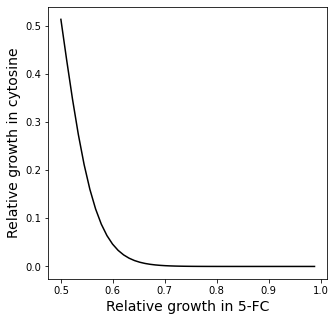

In [565]:
plt.figure(figsize=(5,5))
plt.plot(fc_vals, cy_vals, 'k')

plt.xlabel('Relative growth in 5-FC', fontsize=14)
plt.ylabel('Relative growth in cytosine', fontsize=14)

In [566]:
hill_equation(216, 71,6.10)

0.9988727552719155

In [567]:
hill_equation(1000, 9.14, 0.80)

0.9771586361835396

In [568]:
hill_equation(901, 71,6.10)

0.9999998142817333

In [569]:
colors = sns.color_palette('Greys_r', 4) + ['red']
colors[0]

(0.25098039215686274, 0.25098039215686274, 0.25098039215686274)

(-0.05, 1.05)

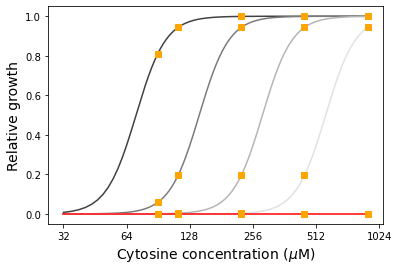

In [570]:
cy_conc = [90,113,225,450,901]

f_red = [1,2,4,8, 1024]


for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color='orange', marker='s', linestyle='none')
    
    
    
    
plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)

([<matplotlib.axis.XTick at 0x7f9d5704d710>,
 [Text(0.125, 0, '0.125'),
  Text(0.5, 0, '0.5'),
  Text(2.0, 0, '2'),
  Text(8.0, 0, '8'),
  Text(32.0, 0, '32'),
  Text(128.0, 0, '128'),
  Text(512.0, 0, '512')])

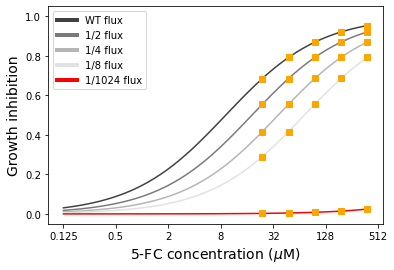

In [571]:
fc_conc = [24,48,97,194,387]

f_red = [1,2,4,8, 4096]

x_vals = np.logspace(np.log2(0.125),np.log2(390), num=100, base=2)


for dim in range(0,5):
    
    plt.plot(x_vals, [hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in x_vals], color=colors[dim], alpha=1)
    plt.plot(fc_conc, [ hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in fc_conc], color='orange', marker='s', linestyle='none')
    
plt.xscale('log', base=2)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]
plt.legend(custom_lines, ['WT flux', '1/2 flux', '1/4 flux', '1/8 flux', '1/1024 flux'], loc='upper left')

plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
plt.ylabel('Growth inhibition', fontsize=14)
plt.ylim(-0.05, 1.05)

plt.xticks([0.125,0.5,2,8,32,128,512], labels = [0.125,0.5,2,8,32,128,512])

(-0.05, 1.05)

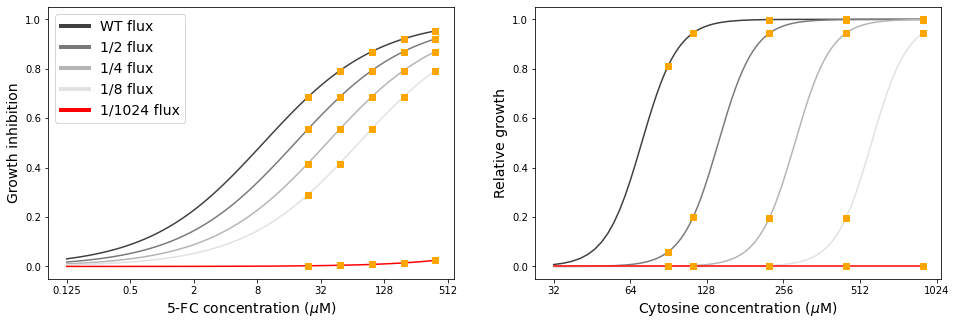

In [572]:
plt.figure(figsize=(16,5))
plt.subplot(121)

x_vals = np.logspace(np.log2(0.125),np.log2(390), num=100, base=2)


for dim in range(0,5):
    
    plt.plot(x_vals, [hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in x_vals], color=colors[dim], alpha=1)
    plt.plot(fc_conc, [ hill_equation(x/f_red[dim], 9.1395844 , 0.80356349) for x in fc_conc], color='orange', marker='s', linestyle='none')
    
plt.xscale('log', base=2)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4)]
plt.legend(custom_lines, ['WT flux', '1/2 flux', '1/4 flux', '1/8 flux', '1/1024 flux'], loc='upper left', fontsize=14)

plt.xlabel('5-FC concentration ($\mu$M)', fontsize=14)
plt.ylabel('Growth inhibition', fontsize=14)
plt.ylim(-0.05, 1.05)

plt.xticks([0.125,0.5,2,8,32,128,512], labels = [0.125,0.5,2,8,32,128,512])


plt.subplot(122)##########################################

for dim in range(0,5):
    
    plt.plot(np.linspace(32,900,300), [hill_equation(x/f_red[dim],70.96510207, 6.10323637) for x in np.linspace(32,900,300)], color=colors[dim], alpha=1)
    plt.plot(cy_conc, [ hill_equation(x/f_red[dim], 70.96510207, 6.10323637) for x in cy_conc], color='orange', marker='s', linestyle='none')
    
    
    
    
plt.xscale('log', base=2)

plt.xticks([32,64,128,256,512,1024], labels = [32,64,128,256,512,1024])

plt.xlabel('Cytosine concentration ($\mu$M)', fontsize=14)
plt.ylabel('Relative growth', fontsize=14)
plt.ylim(-0.05, 1.05)